In [2]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point  #Polygon
from tqdm import tqdm
from itertools import product
import math

In [3]:
# Hosuing prices # trend
home_values = pd.read_csv('LA_home_values.csv', encoding="ISO-8859-1")
home_values_one = pd.read_csv('la_neigh_home_values.csv')


# crime data # lat/lon
# crime_recent = pd.read_csv('crime_datapp.csv')
# crime_old = pd.read_csv('crime_data_la.csv')
crime_all =pd.read_csv('crime_all.csv')
crime_occ= pd.read_csv('LA_crime_occ.csv')
# LA employment # LA-LB-Orange
la_employ=pd.read_csv('employment.csv')
# CPIs # LA-LB-Orange # trend
edu_cpi=pd.read_csv('education_cpi.csv')
food_bev_cpi=pd.read_csv('food_bev_cpi.csv')
fuels_utilities_cpi=pd.read_csv('fuels_utilities_cpi.csv')
housing_cpi = pd.read_csv('housing(shelter)_cpi.csv')
medicare_cpi=pd.read_csv('medicare_cpi.csv')
other_goods_cpi=pd.read_csv('other_goods_cpi.csv')
recreation_cpi=pd.read_csv('recreation_cpi.csv')
transportation_cpi=pd.read_csv('transportation_cpi.csv')
service_cpi=pd.read_csv('commodity_service_cpi.csv')
apparel_cpi=pd.read_csv('apparel_cpi.csv')
all_cpi=pd.read_csv('all_items_cpi.csv')
# Education
edu_stats=pd.read_csv('ODN_Education.csv') # All United States
lalban_edu=pd.read_csv('LA_LB_AN_edu.csv')


# LA population # no trend
la_pop_dense=pd.read_csv('la_population_dense_2000.csv')
la_pop_race=pd.read_csv('la_pop_race_2021.csv')
la_pop_census=pd.read_csv('la_pop_2010_census.csv')
la_pop_crime=pd.read_csv('la_pop_crime.csv')
socal_pop=pd.read_csv('socal_pop.csv') # trend but county level
# Proximity to hospital and park # no trend #lat/lon
hospital_loc = pd.read_csv('hospital_facility_la.csv')
park_loc= pd.read_csv('park_facilities_la.csv')
# Community social aspects # no trend #lat/lon
la_places=pd.read_csv('LA_places_cleaned.csv') #195008 places
la_restaurants=pd.read_csv('LA_places_complete.csv') # 3669 restaurants with menus
# Income per capita
income_la=pd.read_csv('Income_per_Capita_(census_tract).csv') # LA


# Biz type # California
cbp_2016 = pd.read_csv('biz_type/2016cbp.csv')
cbp_2017 = pd.read_csv('biz_type/2017cbp.csv')
cbp_2018 = pd.read_csv('biz_type/2018cbp.csv')
cbp_2019 = pd.read_csv('biz_type/2019cbp.csv')
cbp_2020 = pd.read_csv('biz_type/2020cbp.csv')

In [4]:
final_neigh=pd.read_csv('final_neigh_list.csv')

In [5]:
num_hospital=pd.read_csv('num_hospital.csv')
num_park=pd.read_csv('num_park.csv')
num_social=pd.read_csv('num_social.csv')

In [36]:
num_social

,social_neighborhood,count
0,invalid_neigh,26630
1,Long Beach,2058
2,Downtown,966
3,Pasadena,820
4,Torrance,779
...,...,...
101,Ladera Heights,25
102,Shadow Hills,23
103,Griffith Park,22
104,Cheviot Hills,21


In [17]:
final_neigh['num_social']=0
final_neigh['num_park']=0
final_neigh['num_hospital']=0

In [32]:
len(num_hospital.loc[num_hospital['hospital_neighborhood']==final_neigh['neighborhood'][0]])

0

In [26]:
num_hospital.loc[num_hospital['hospital_neighborhood']=='Jefferson Park']['count'].values[0]

1

In [34]:
for i in tqdm(range(len(final_neigh))):
    if len(num_hospital.loc[num_hospital['hospital_neighborhood']==final_neigh['neighborhood'][i]]) == 0:
        final_neigh['num_hospital'][i] =0
    else:
        final_neigh['num_hospital'][i] =num_hospital.loc[num_hospital['hospital_neighborhood']==final_neigh['neighborhood'][i]]['count'].values[0]
    

100%|███████████████████████████████████████| 105/105 [00:00<00:00, 2557.74it/s]


In [35]:
for i in tqdm(range(len(final_neigh))):
    if len(num_park.loc[num_park['park_neighborhood']==final_neigh['neighborhood'][i]]) == 0:
        final_neigh['num_park'][i] =0
    else:
        final_neigh['num_park'][i] =num_park.loc[num_park['park_neighborhood']==final_neigh['neighborhood'][i]]['count'].values[0]
    

100%|███████████████████████████████████████| 105/105 [00:00<00:00, 2298.50it/s]


In [37]:
for i in tqdm(range(len(final_neigh))):
    if len(num_social.loc[num_social['social_neighborhood']==final_neigh['neighborhood'][i]]) == 0:
        final_neigh['num_social'][i] =0
    else:
        final_neigh['num_social'][i] =num_social.loc[num_social['social_neighborhood']==final_neigh['neighborhood'][i]]['count'].values[0]
    

100%|███████████████████████████████████████| 105/105 [00:00<00:00, 2545.26it/s]


In [39]:
final_neigh.to_csv('num_places_final.csv', encoding='utf-8', index=False)

In [208]:
final_neigh=pd.read_csv('num_places_final.csv')

In [209]:
final_neigh=final_neigh.sort_values(['neighborhood']).reset_index(drop=True)

In [210]:
home_values_final= home_values_one.loc[home_values_one['Neighborhood'].isin(final_neigh['neighborhood'])].reset_index(drop=True)

In [211]:
home_values_final['trend']= (home_values_final['2022']/home_values_final['2020']) - 1

In [212]:
final_neigh['potential']=list(home_values_final.sort_values(['Neighborhood'])['trend'])

In [213]:
set(final_neigh['neighborhood'])-set(density_final['NEIGHBORHOOD'])

{'Griffith Park'}

In [214]:
final_neigh.loc[final_neigh['neighborhood']=='Griffith Park']

,neighborhood,num_social,num_park,num_hospital,potential
33,Griffith Park,22,26,0,0.27208


In [215]:
final_neigh=final_neigh.drop([33]).reset_index(drop=True)

In [216]:
density_final= la_pop_dense.loc[la_pop_dense['NEIGHBORHOOD'].isin(final_neigh['neighborhood'])].reset_index(drop=True)

In [217]:
final_neigh['density']=list(density_final.sort_values(['NEIGHBORHOOD'])['POPULATION PER SQMI'])

In [218]:
final_neigh.columns

Index(['neighborhood', 'num_social', 'num_park', 'num_hospital', 'potential',
       'density'],
      dtype='object')

In [261]:
final_neigh['lc_neigh']= final_neigh['neighborhood'].str.lower()

In [272]:
n=list(set(final_neigh['lc_neigh'])-set(income_final['neighborhood']))

In [276]:
n

['florence',
 'cypress park',
 'historic south-central',
 'arlington heights',
 'mid-city',
 'sawtelle',
 'beverly grove',
 'fairfax',
 'pico-robertson',
 'lake view terrace']

In [287]:
final_neigh.loc[final_neigh['lc_neigh']=='lake view terrace']

,neighborhood,num_social,num_park,num_hospital,potential,density,norm_potential,norm_social,score,y,lc_neigh
46,Lake View Terrace,11,2.1,0.1,0.361085,2790,0.673276,-0.961651,-1.250027,0,lake view terrace


In [288]:
final_neigh=final_neigh.drop([28]).reset_index(drop=True)
final_neigh=final_neigh.drop([18]).reset_index(drop=True)
final_neigh=final_neigh.drop([37]).reset_index(drop=True)
final_neigh=final_neigh.drop([3]).reset_index(drop=True)

final_neigh=final_neigh.drop([52]).reset_index(drop=True)
final_neigh=final_neigh.drop([77]).reset_index(drop=True)
final_neigh=final_neigh.drop([7]).reset_index(drop=True)
final_neigh=final_neigh.drop([27]).reset_index(drop=True)
final_neigh=final_neigh.drop([67]).reset_index(drop=True)
final_neigh=final_neigh.drop([46]).reset_index(drop=True)

In [290]:
final_neigh['income']=income_final['Income']

In [291]:
final_neigh

,neighborhood,num_social,num_park,num_hospital,potential,density,norm_potential,norm_social,score,y,lc_neigh,income
0,Alhambra,325,0.1,1.1,0.271469,11275,-0.381982,0.255640,0.129299,1,alhambra,32506.600000
1,Arcadia,295,0.1,1.1,0.265294,4749,-0.454693,0.139338,-0.176016,0,arcadia,37797.000000
2,Arleta,36,2.1,0.1,0.373032,10034,0.813962,-0.864733,-0.915505,0,arleta,22606.375000
3,Atwater Village,114,6.1,0.1,0.321698,8379,0.209483,-0.562349,-0.915214,0,atwater village,42816.500000
4,Avalon,62,0.1,1.1,-0.011995,1159,-3.719868,-0.763939,-5.247745,0,avalon,40011.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
89,Whittier,438,0.1,4.1,0.324459,5688,0.241992,0.693710,1.629412,1,whittier,51682.500000
90,Willowbrook,60,0.1,1.1,0.303859,9117,-0.000580,-0.771692,-1.543964,0,willowbrook,18135.500000
91,Wilmington,130,11.1,0.1,0.335715,5636,0.374542,-0.500321,-0.626101,0,wilmington,18052.200000
92,Winnetka,146,2.1,0.1,0.368062,9826,0.755436,-0.438294,-0.121151,0,winnetka,29380.461538


In [265]:
income_final=ppp.loc[ppp['neighborhood'].isin(final_neigh['lc_neigh'])].sort_values(by=['neighborhood']).reset_index(drop=True)

In [266]:
income_final

,Unnamed: 0,neighborhood,Income
0,43,alhambra,32506.600000
1,28,arcadia,37797.000000
2,38,arleta,22606.375000
3,86,atwater village,42816.500000
4,21,avalon,40011.000000
...,...,...,...
89,49,whittier,51682.500000
90,85,willowbrook,18135.500000
91,82,wilmington,18052.200000
92,37,winnetka,29380.461538


In [300]:
x=final_neigh[['num_social', 'num_park', 'num_hospital','density','income']]

In [125]:
x.to_csv('neigh_final.csv', encoding='utf-8', index=False)

In [429]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
final_neigh['norm_potential'] = StandardScaler().fit_transform(np.array(final_neigh['potential']).reshape(-1,1))
final_neigh['norm_social'] = StandardScaler().fit_transform(np.array(final_neigh['num_social']).reshape(-1,1))

In [221]:
final_neigh['score']= final_neigh['norm_social']*2+final_neigh['norm_potential']

In [222]:
final_neigh['num_park']= final_neigh['num_park']+0.1
final_neigh['num_hospital']= final_neigh['num_hospital']+0.1

In [223]:
final_neigh['y'] = 0

In [224]:
for i in range(len(final_neigh)):
    if final_neigh['score'][i] > 0:
        final_neigh['y'][i] =1
    else:
        final_neigh['y'][i] =0

In [304]:
good_neigh2=final_neigh.loc[final_neigh['y']==1]

In [242]:
good_neigh.sort_values(by=['score'], ascending=False)[:10]

,neighborhood,num_social,num_park,num_hospital,potential,density,norm_potential,norm_social,score,y
50,Long Beach,2058,0.1,7.1,0.314279,8882,0.122121,6.974005,14.070131,1
66,Pasadena,820,0.1,4.1,0.302399,5366,-0.017763,2.174619,4.331475,1
75,Santa Clarita,734,0.1,1.1,0.344115,2745,0.473449,1.841221,4.155891,1
83,Torrance,779,0.1,2.1,0.307809,6701,0.045936,2.015673,4.077283,1
30,Glendale,685,0.1,3.1,0.347001,6368,0.507432,1.651261,3.809954,1
20,Downtown,966,8.1,2.1,0.140007,4770,-1.929987,2.740621,3.551255,1
10,Burbank,628,0.1,1.1,0.336939,5785,0.388949,1.430288,3.249525,1
48,Lancaster,399,0.1,2.1,0.453621,1180,1.762927,0.542518,2.847963,1
69,Pomona,488,0.1,2.1,0.379418,6556,0.889159,0.887546,2.664252,1
88,Van Nuys,420,3.1,2.1,0.412534,11542,1.279114,0.623929,2.526973,1


In [301]:
y=final_neigh['y']

In [411]:
final_neigh.to_csv('rec_df.csv', encoding='utf-8', index=False)

In [410]:
final_neigh.loc[final_neigh['neighborhood']=='Long Beach']

,neighborhood,num_social,num_park,num_hospital,potential,density,norm_potential,norm_social,score,y,lc_neigh,income
44,Long Beach,2058,0.1,7.1,0.314279,8882,0.122121,6.974005,4.370131,1,long beach,16919.916667


In [409]:
final_neigh['score'][44] = 4.370131305295382

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


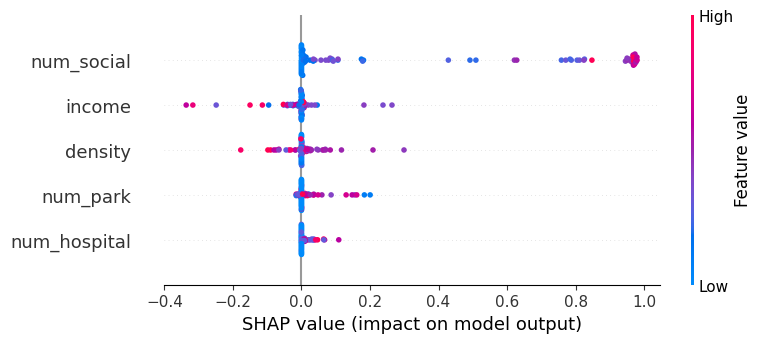

In [302]:
import xgboost
import shap
import numpy as np

# train XGBoost model
model = xgboost.XGBClassifier().fit(x.values, y)

# A masking function takes a binary mask vector as the first argument and
# the model arguments for a single sample after that
# It returns a masked version of the input x, where you can return multiple
# rows to average over a distribution of masking types
def custom_masker(mask, x):
    return (x * mask).reshape(1,len(x)) # in this simple example we just zero out the features we are masking

# compute SHAP values
explainer = shap.Explainer(model.predict_proba, custom_masker)
shap_values = explainer(x[:100])

# plot the SHAP values for the positive class
shap.plots.beeswarm(shap_values[...,1])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


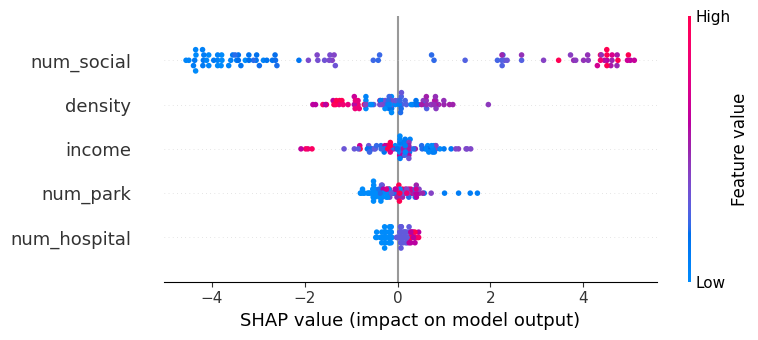

In [303]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x)

In [391]:
xgboost_stats=pd.read_csv('xgboost_stats.csv')

In [245]:
xgboost_stats

,pred_oasi,date,true_oasi
0,0.840151,2019-02,1.152137
1,0.919889,2019-03,0.768536
2,0.910116,2019-04,0.835356
3,0.853856,2019-05,0.780288
4,0.841316,2019-06,0.758189
...,...,...,...
56,0.436457,2023-10,NaN
57,0.483422,2023-11,NaN
58,0.456241,2023-12,NaN
59,0.437924,2024-01,NaN


In [408]:
good_neigh2.sort_values(by=['score'], ascending=False)[:10]

,neighborhood,num_social,num_park,num_hospital,potential,density,norm_potential,norm_social,score,y,lc_neigh,income
44,Long Beach,2058,0.1,7.1,0.314279,8882,0.122121,6.974005,14.070131,1,long beach,16919.916667
58,Pasadena,820,0.1,4.1,0.302399,5366,-0.017763,2.174619,4.331475,1,pasadena,52946.352941
66,Santa Clarita,734,0.1,1.1,0.344115,2745,0.473449,1.841221,4.155891,1,santa clarita,39351.456522
73,Torrance,779,0.1,2.1,0.307809,6701,0.045936,2.015673,4.077283,1,torrance,46454.515152
26,Glendale,685,0.1,3.1,0.347001,6368,0.507432,1.651261,3.809954,1,glendale,43103.384615
17,Downtown,966,8.1,2.1,0.140007,4770,-1.929987,2.740621,3.551255,1,downtown,55741.066667
8,Burbank,628,0.1,1.1,0.336939,5785,0.388949,1.430288,3.249525,1,burbank,44735.480000
42,Lancaster,399,0.1,2.1,0.453621,1180,1.762927,0.542518,2.847963,1,lancaster,24170.500000
61,Pomona,488,0.1,2.1,0.379418,6556,0.889159,0.887546,2.664252,1,pomona,29606.700000
78,Van Nuys,420,3.1,2.1,0.412534,11542,1.279114,0.623929,2.526973,1,van nuys,23037.761905


In [325]:
xgboost_stats['pred_oasi']

0     0.840151
1     0.919889
2     0.910116
3     0.853856
4     0.841316
        ...   
56    0.576123
57    0.642952
58    0.611362
59    0.591197
60    0.652444
Name: pred_oasi, Length: 61, dtype: float64

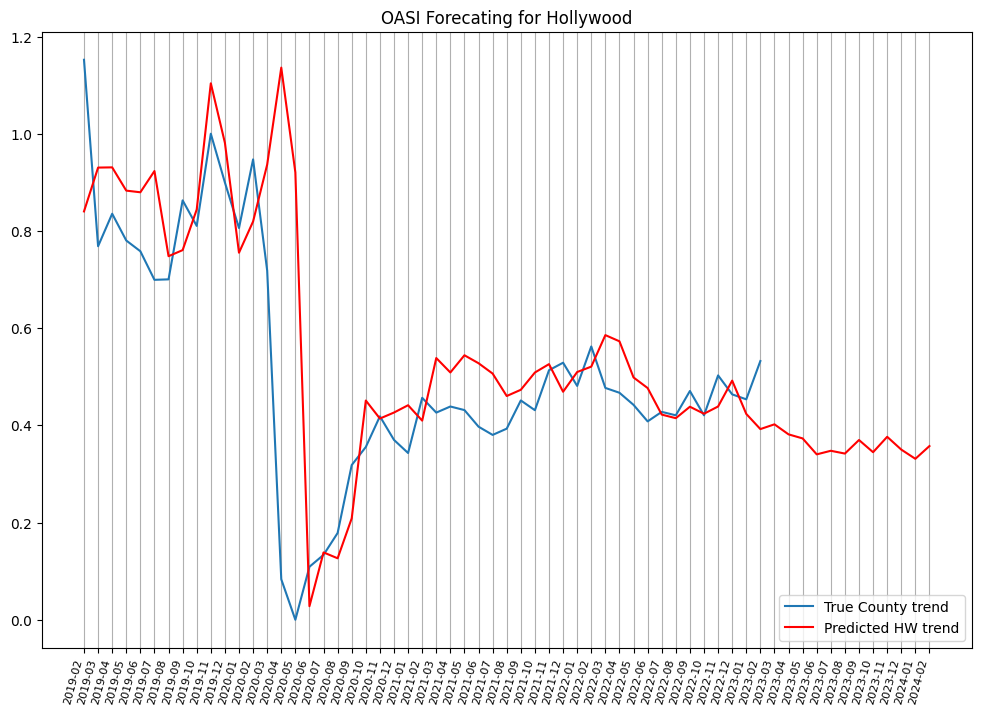

In [402]:
fig, ax = plt.subplots(figsize = (12,8))
ax.xaxis.grid()
plt.plot(xgboost_origin['date'], xgboost_origin['true_oasi'], label='True County trend')
plt.plot(xgboost_stats['date'], xgboost_stats['pred_oasi'], color='red', label='Predicted HW trend')
plt.setp(ax.get_xticklabels(), rotation = 75, 
         ha = 'right', fontsize = 8, 
         color = 'black')
plt.legend(loc="lower right")
plt.title('OASI Forecating for Hollywood')
plt.show()

In [430]:
final_neigh['Social places score'] = MinMaxScaler().fit_transform(np.array(final_neigh['num_social']).reshape(-1,1))
final_neigh['Park places score'] = MinMaxScaler().fit_transform(np.array(final_neigh['num_park']).reshape(-1,1))
final_neigh['Hosptial places score'] = MinMaxScaler().fit_transform(np.array(final_neigh['num_hospital']).reshape(-1,1))
final_neigh['Population Density score'] = MinMaxScaler().fit_transform(np.array(final_neigh['density']).reshape(-1,1))

In [437]:
rec_df

,neighborhood,Social places score,Park places score,Hosptial places score,Population Density score,income,potential,score
0,Alhambra,0.153395,0.000000,0.142857,0.278548,32506.600000,0.271469,0.129299
1,Arcadia,0.138740,0.000000,0.142857,0.103776,37797.000000,0.265294,-0.176016
2,Arleta,0.012213,0.153846,0.000000,0.245313,22606.375000,0.373032,-0.915505
3,Atwater Village,0.050318,0.461538,0.000000,0.200991,42816.500000,0.321698,-0.915214
4,Avalon,0.024915,0.000000,0.142857,0.007633,40011.000000,-0.011995,-5.247745
...,...,...,...,...,...,...,...,...
89,Whittier,0.208598,0.000000,0.571429,0.128923,51682.500000,0.324459,1.629412
90,Willowbrook,0.023937,0.000000,0.142857,0.220755,18135.500000,0.303859,-1.543964
91,Wilmington,0.058134,0.846154,0.000000,0.127531,18052.200000,0.335715,-0.626101
92,Winnetka,0.065950,0.153846,0.000000,0.239743,29380.461538,0.368062,-0.121151


In [436]:
rec_df=final_neigh[['neighborhood','Social places score','Park places score','Hosptial places score','Population Density score','income','potential','score']]

In [485]:
rec_df.to_csv('rec_df.csv', encoding='utf-8', index=False)

In [488]:
rec_df

,neighborhood,Proximity to Social Places,Proximity to Parks,Hosptial places score,Population Density score,income,potential,score
0,Alhambra,0.153395,0.000000,0.142857,0.278548,32506.600000,0.271469,0.129299
1,Arcadia,0.138740,0.000000,0.142857,0.103776,37797.000000,0.265294,-0.176016
2,Arleta,0.012213,0.153846,0.000000,0.245313,22606.375000,0.373032,-0.915505
3,Atwater Village,0.050318,0.461538,0.000000,0.200991,42816.500000,0.321698,-0.915214
4,Avalon,0.024915,0.000000,0.142857,0.007633,40011.000000,-0.011995,-5.247745
...,...,...,...,...,...,...,...,...
89,Whittier,0.208598,0.000000,0.571429,0.128923,51682.500000,0.324459,1.629412
90,Willowbrook,0.023937,0.000000,0.142857,0.220755,18135.500000,0.303859,-1.543964
91,Wilmington,0.058134,0.846154,0.000000,0.127531,18052.200000,0.335715,-0.626101
92,Winnetka,0.065950,0.153846,0.000000,0.239743,29380.461538,0.368062,-0.121151


In [440]:
low_income_df=rec_df.loc[rec_df['income']<=30000].reset_index(drop=True)
mid_income_df=rec_df.loc[rec_df['income']<=50000].reset_index(drop=True)
high_income_df=rec_df.loc[rec_df['income']>50000].reset_index(drop=True)

In [424]:
# 30,000 # 50,000
if income_s == 'Income (<$60k)':
    low_income_df = rec_df.loc[rec_df['income']<=30000].reset_index(drop=True)
elif income_s == 'Income (<$100k)':
    mid_income_df = rec_df.loc[rec_df['income']<=50000].reset_index(drop=True)
elif income_s == 'Income (>$100k)':
    high_income_df = rec_df.loc[rec_df['income']>50000].reset_index(drop=True)

count        94.000000
mean      38700.329039
std       22186.566491
min        7645.000000
25%       23983.013393
50%       31400.589286
75%       46185.053030
max      131093.200000
Name: income, dtype: float64

In [452]:
x=rec_df.loc[rec_df['income']>30000].reset_index(drop=True)

In [456]:
x=x.loc[x['income']<=50000].reset_index(drop=True)

In [477]:
tt=high_income_df.loc[high_income_df['Population Density score']<=0.3]

In [478]:
tt.sort_values(by=['Park places score','Social places score'], ascending=False)

,neighborhood,Social places score,Park places score,Hosptial places score,Population Density score,income,potential,score
17,West Hills,0.042990,1.000000,0.142857,0.098473,50586.545455,0.359918,-0.581458
16,Venice,0.141671,0.769231,0.000000,0.295046,92999.636364,-0.007336,-3.339798
15,Sun Valley,0.079140,0.769231,0.142857,0.192126,56502.000000,0.353719,-0.080705
3,Downtown,0.466536,0.615385,0.285714,0.104339,55741.066667,0.140007,3.551255
7,Pacific Palisades,0.033219,0.615385,0.000000,0.004660,131093.200000,0.180917,-2.844332
22,Woodland Hills,0.163166,0.461538,0.142857,0.084788,56971.750000,0.434975,2.209706
14,Sherman Oaks,0.146556,0.461538,0.142857,0.155678,79018.142857,0.397587,1.505838
19,Westchester,0.239863,0.384615,0.000000,0.079405,55569.533333,0.245661,1.197761
0,Brentwood,0.072789,0.384615,0.000000,0.031735,98098.636364,0.184108,-2.178722
1,Cheviot Hills,0.004885,0.384615,0.000000,0.097643,94525.000000,0.164966,-3.481852


In [484]:
rec_df=rec_df.rename(columns={"Social places score": "Proximity to Social Places",
               "Park places score": "Proximity to Parks",
               "Hospital places score": "Proximity to Hospitals"})

In [441]:


if d == 'Less Population Density':
    low_income_df = rec_df.loc[rec_df['income']<=30000].reset_index(drop=True)
elif d == 'Income (<$100k)':
    mid_income_df = rec_df.loc[rec_df['income']<=50000].reset_index(drop=True)

,neighborhood,Social places score,Park places score,Hosptial places score,Population Density score,income,potential,score
0,Arleta,0.012213,0.153846,0.000000,0.245313,22606.375000,0.373032,-0.915505
1,Baldwin Park,0.090376,0.000000,0.428571,0.275897,20976.437500,0.349332,0.045969
2,Beverly Grove,0.133854,0.153846,0.142857,0.324478,16549.956522,0.180316,-1.254194
3,Canoga Park,0.099658,0.384615,0.000000,0.304392,27938.411765,0.364134,0.367580
4,Chinatown,0.036639,0.076923,0.142857,0.259614,26968.000000,0.182570,-2.770584
5,Commerce,0.071324,0.000000,0.142857,0.027799,21825.666667,0.281122,-1.059606
6,East Hollywood,0.122130,0.384615,0.428571,0.809347,27676.875000,0.224031,-0.925518
7,East Los Angeles,0.168539,0.000000,0.428571,0.428200,18064.148148,0.296177,0.660605
8,El Sereno,0.050806,0.615385,0.000000,0.239743,24741.000000,0.294708,-1.225271
9,Fairfax,0.085979,0.461538,0.000000,0.247670,29152.687500,0.125086,-2.664387
